In [1]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
     self.eta = eta
     self.n_iter = n_iter
     self.random_state = random_state
 
     def fit(self, X, y):
         rgen = np.random.RandomState(self.random_state)
         self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
         self.cost_ = []
         for i in range(self.n_iter):
             net_input = self.net_input(X)
             output = self.activation(net_input)
             errors = (y - output)
             self.w_[1:] += self.eta * X.T.dot(errors)
             self.w_[0] += self.eta * errors.sum()
             cost = (errors**2).sum() / 2.0
             self.cost_.append(cost)
             return self
     
     def net_input(self, X):
 
         return np.dot(X, self.w_[1:]) + self.w_[0]
 
     def activation(self, X):
 
         return X
 
     def predict(self, X):

         return np.where(self.activation(self.net_input(X))>= 0.0, 1, -1)

AttributeError: 'AdalineGD' object has no attribute 'fit'

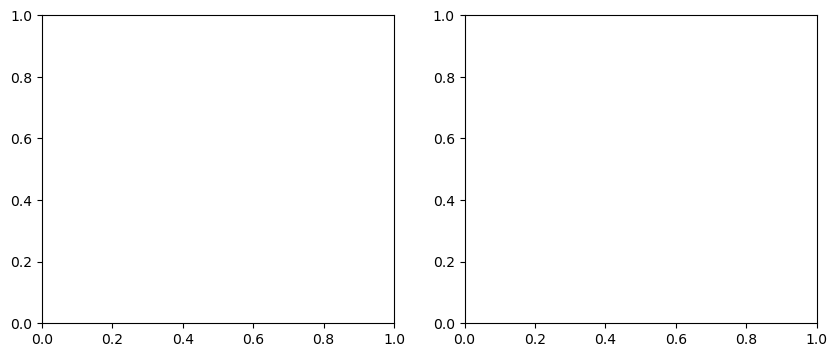

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()